<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 9. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Cache-Effekte</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>



In der Vorlesung haben wir anhand einfacher physikalischer Überlegungen untersucht, wie schnell sich Informationen im Computer (maximal) ausbreiten können und was dies für die geometrische Anordnung etwa von CPU und Speicher bedeutet.
Illustrieren Sie diese Überlegungen für einen CPU Chip von 3cm Kantenlänge: Wie hoch darf die Taktfrequenz einer solchen CPU höchstens sein, damit die beiden am weitesten voneinander entferntesten Punkte des Chips wähnend eines Taktes noch Informationen austauschen können, also Information von einem Punkt zum anderen und wieder zurück übertragen können? Be- denken Sie dabei, dass die Leiterbahnen auf einem CHIP nicht diagonal sondern in Manhattan- Form (rechtwinklig) verlegt sind.

$d = 2*(3cm+3cm)=12 cm$ Doppelter Weg in einem Takt

$c/d = (3*10^8) / (12 * 10^{-2}) = 2,5*10^9$ Max Taktrate: `2,5 GB`

Um diesen elementaren Flaschenhals zu vermeiden, werden in modernen Chips verschiedene Speicher-Ebenen (sogenannte Cache-Level) verbaut, die in unmittelbarer Nähe zu den Rechen-Cores auf dem Chip angesiedelt werden.
In dieser Aufgabe wollen wir untersuchen, ob wir mit einem recht elementaren Programm diese Speicherstruktur sichtbar machen können. 

Untersuchen Sie dazu den folgenden von uns verlinkten C++ code. Lesen Sie diesen detailliert kommentierten Quellcode, welchen Sie allein mit Ihren Julia-Kenntnissen verstehen können sollten, und beschreiben Sie in Worten den Ablauf des Programms. Skizzieren Sie dazu – ähnlich zu der in der Vorlesung verwandten Notation – einen Flussablauf des Programms.

```c
// Einbinden von Bibliotheken aehnlich zu "using" oder "import" in Julia
#include <iostream>
#include <sys/time.h>
#include <math.h>

// das Hauptprogramm
int main() {

    // Anzahl der Datenpunkte
    int steps = 18;

    for (int i = 0; i < steps; ++i) {
        // Groesse des Arrays
        int kbytes = int(pow(2., double(i)));
        int array_size = kbytes * 1024;

        // Array initialisieren, aequivalent zu zeros(array_size)
        unsigned int * array = new unsigned int[array_size];
        for (int j  = 0; j < array_size; ++j) array[j] = 0;

        // Messung starten
        clock_t start = clock();

        // Eigentlich eine Schleife, muss aus praktischen Gruenden
        // aufgeteilt werden
        for (int k = 0; k < (1024 * 4 - 1); ++k)
            for(int j = 0; j < 1024 * 1024; ++j)
                ++array[(j * 16) % array_size];
                
        // Messung stoppen
        clock_t elapsed = clock() - start;

        // Array loeschen, geschieht in Julia automatisch
        delete [] array;

        // Daten ausgeben
        std::cout << kbytes << " " << elapsed << std::endl;
    }
}
```

### Beschreibung ###
- wir fuehren das Programm fuer `1kb 2kb 4kb 8kb` usw... bis $2^{17}$`kb` aus und initialisieren ein array mit dieser groesse.
- nun speichern wir die CPU-Zeit
- da ein int 4 Byte hat incrementieren wir alle 16 eintraege im array. Hierfuer muessen wir fuer jede Operation das array aus dem cache laden. Fuer bestimmte Array greossen dauert koennen verschiedene Caches genutzt werden.
- nun messen wir die Zeit fuer jede verschiedene arraygroesse und geben diese im csv format an cout

Dieses Programm finden Sie außerdem in Ihrem git Verzeichnis. Mit dem Ausführen der nächsten Zeile wird ein Skript gestartet, mit dem dieses Programm kompiliert und gestartet wird. Dieser Prozess wird ca. 10 Minuten dauern und hängt auch davon ab, wie ausgelastet der JuliaBox-Server ist. 

In [ ]:
run(`chmod +x ./04_cache_effekte.sh`)
run(`./04_cache_effekte.sh`)

Wir nutzen nun das Paket *DataFrames*, um die Ausgabe des Programms zu verarbeiten und grafisch darzustellen. 

INFO: Cloning cache of ArrayViews from git://github.com/JuliaLang/ArrayViews.jl.git
INFO: Cloning cache of DataArrays from git://github.com/JuliaStats/DataArrays.jl.git
INFO: Cloning cache of DataFrames from git://github.com/JuliaStats/DataFrames.jl.git
INFO: Cloning cache of Docile from git://github.com/MichaelHatherly/Docile.jl.git
INFO: Cloning cache of GZip from git://github.com/JuliaLang/GZip.jl.git
INFO: Cloning cache of SortingAlgorithms from git://github.com/JuliaLang/SortingAlgorithms.jl.git
INFO: Cloning cache of StatsBase from git://github.com/JuliaStats/StatsBase.jl.git
INFO: Cloning cache of StatsFuns from git://github.com/JuliaStats/StatsFuns.jl.git
INFO: Installing ArrayViews v0.6.4
INFO: Installing DataArrays v0.2.20
INFO: Installing DataFrames v0.7.0
INFO: Installing Docile v0.5.23
INFO: Installing GZip v0.2.18
INFO: Installing SortingAlgorithms v0.0.6
INFO: Installing StatsBase v0.8.0
INFO: Installing StatsFuns v0.2.0
INFO: Package database updated
INFO: METADATA is o

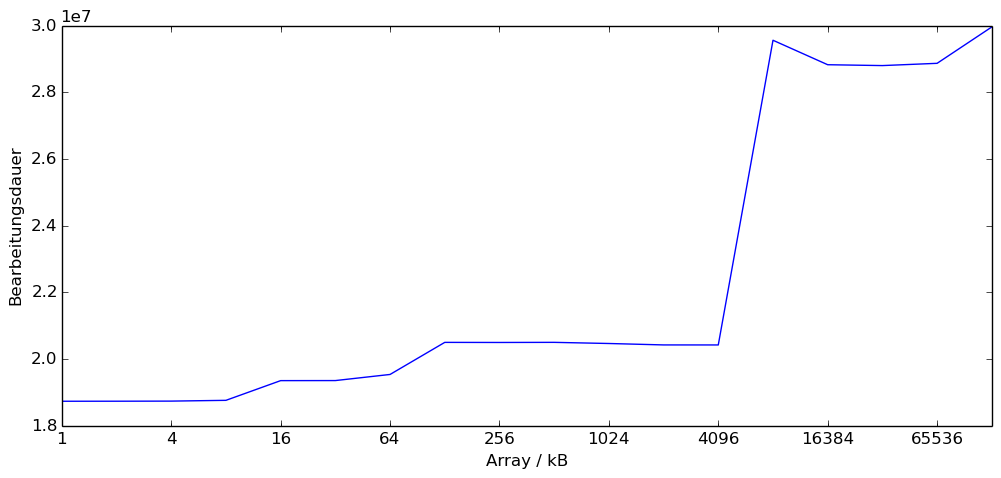

PyObject <matplotlib.text.Text object at 0x7f66cc7286d0>

In [1]:
Pkg.add("DataFrames")
using DataFrames
using PyPlot

figure(figsize=(12, 5))
data = readtable("04_cache_effekte.csv", separator=' ', header=false)
x_values = [Int(2^x) for x in log2(data[:, 1])]
plot(x_values, data[:, 2])
gca()[:set_xscale]("log", basex=2)
xticks(x_values[1:2:end], [string(x) for x in x_values][1:2:end])
xlabel("Array / kB")
ylabel("Bearbeitungsdauer")

Erklären Sie den Verlauf der Kurve. Schätzen Sie die Größen der einzelnen Cachelevel ab.

## Erklaerung ##
fuer jedes array das nicht mehr in den nachsten Cache passt, muss ein Cache weiter entfernt genutzt werden. Hierbei brauchen die Daten laenger fuer ihren Weg, wodurch die Dauer in die hoehe schnellt. Da im Code immer gleich oft Iteriert wird, ist dies nicht von der Taktzeit abhaengig, sondern rein von der Datenuebertragung.

## Moegliche Cachesizes ##
Level 1: `8KB`

Level 2: `64KB`

Level 3: `4MB`
